In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import linear_model

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

### Train set

In [2]:
train_df = pd.read_csv('../data/final_diamonds_train.csv', index_col=[0])
train_df.head()

,price,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,3733,1.01,65.2,56.0,6.23,6.19,4.05,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9452,1.51,65.0,64.0,7.10,7.03,4.59,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12765,2.00,65.2,56.0,7.92,7.87,5.15,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,17713,1.99,60.5,63.0,8.20,8.11,4.93,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2268,0.70,65.0,56.0,5.60,5.50,3.61,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
correlation = train_df['price'].corr(train_df['carat'])
print("Correlation between price and carat:", correlation)

Correlation between price and carat: 0.9219351745876608


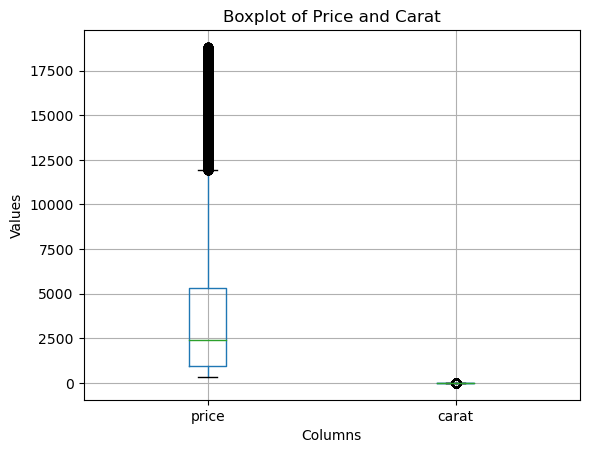

In [6]:
# Create a boxplot
train_df.boxplot(column=['price', 'carat'])
plt.title('Boxplot of Price and Carat')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [7]:
correlation_matrix = train_df[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']].corr()
print(correlation_matrix)

          price     carat     depth     table         x         y         z
price  1.000000  0.921935 -0.014864  0.130111  0.885848  0.866163  0.874500
carat  0.921935  1.000000  0.026528  0.183392  0.975688  0.951667  0.967570
depth -0.014864  0.026528  1.000000 -0.293114 -0.026348 -0.030966  0.094655
table  0.130111  0.183392 -0.293114  1.000000  0.196059  0.184673  0.155189
x      0.885848  0.975688 -0.026348  0.196059  1.000000  0.973712  0.984876
y      0.866163  0.951667 -0.030966  0.184673  0.973712  1.000000  0.964828
z      0.874500  0.967570  0.094655  0.155189  0.984876  0.964828  1.000000


In [57]:
#train_df.info()

In [58]:
# creating X and y

X = train_df.drop('price', axis=1)
X.head()

,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.01,65.2,56.0,6.23,6.19,4.05,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.51,65.0,64.0,7.10,7.03,4.59,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.00,65.2,56.0,7.92,7.87,5.15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.99,60.5,63.0,8.20,8.11,4.93,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.70,65.0,56.0,5.60,5.50,3.61,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
y = train_df['price']
y

0         3733
1         9452
2        12765
3        17713
4         2268
         ...  
40450     3193
40451    15898
40452      666
40453     1945
40454     6521
Name: price, Length: 40455, dtype: int64

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# to confirm the sizes of sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32364, 39)
X_test shape: (8091, 39)
y_train shape: (32364,)
y_test shape: (8091,)


In [62]:
#  Data scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Model definition

#model = LinearRegression()
model = ExtraTreesRegressor() #GradientBoostingRegressor()
model

ExtraTreesRegressor()

In [64]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
CPU times: total: 26.7 s
Wall time: 32.2 s


In [65]:

# Model predictions

predictions = model.predict(X_test)
predictions

array([4623., 2696., 1698., ..., 6503., 4896.,  399.])

In [66]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")
tricky_error

Speed predictions error is: +/- 1.55877 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


1.55877

In [67]:
%%time

# Model training

weights = model.fit(X_train, y_train)
weights

CPU times: total: 23.5 s
Wall time: 26.8 s


ExtraTreesRegressor()

In [68]:
%%time

# Model predictions

predictions = model.predict(X_test)
predictions

CPU times: total: 203 ms
Wall time: 370 ms


array([4641.76, 2527.81, 1735.94, ..., 5898.28, 4967.95,  499.15])

In [69]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
real_error

561.17285

### Test set

In [70]:
# test diamond ML

test_df = pd.read_csv('../data/final_diamonds_test.csv',index_col=[0])
test_df

,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,5.82,5.89,3.67,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.57,61.9,56.0,5.35,5.32,3.30,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,0.71,62.2,55.0,5.71,5.73,3.56,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13482,0.70,61.6,55.0,5.75,5.71,3.53,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13483,0.70,58.8,57.0,5.85,5.89,3.45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
# Model definition

#model = LinearRegression()
model = ExtraTreesRegressor() #GradientBoostingRegressor()
model

ExtraTreesRegressor()

In [72]:
%%time

# Model training

weights = model.fit(X_train, y_train)
weights

CPU times: total: 23.9 s
Wall time: 28.7 s


ExtraTreesRegressor()

In [73]:
# Model predictions

predictions = model.predict(test_df)
predictions

array([2944.51, 5376.41, 9662.1 , ..., 3037.55, 2092.46,  841.57])

In [35]:
# Create a dataframe with the predicted price
predictions_df = pd.DataFrame({'price': predictions})
predictions_df

,price
0,2954.23
1,5366.89
2,9694.74
3,3923.77
4,1688.12
...,...
13480,1631.66
13481,2451.57
13482,3017.07
13483,2072.82


In [36]:
# Set the name of the index as 'id'
predictions_df = predictions_df.rename_axis('id')

In [37]:
predictions_df

,price
id,
0,2954.23
1,5366.89
2,9694.74
3,3923.77
4,1688.12
...,...
13480,1631.66
13481,2451.57
13482,3017.07


In [38]:
#predictions_df.to_csv('../data/predict-2.csv') #with linearregression

In [39]:
predictions_df.to_csv('../predictions/predict-14.csv') #with linearregression